## Uses PyTrends
* Find Documenation here https://pypi.org/project/pytrends/
* First run pip install pytrends in terminal

In [18]:
# You need to run "pip install pytrends" in terminal in order to import pytrends
from pytrends.request import TrendReq
import pandas as pd
import time
import matplotlib.pyplot as plt
startTime = time.time()
pytrend = TrendReq(hl='en-US', tz=360)

colnames = ["keywords"]
df = pd.read_csv("search_terms.csv", names=colnames)
df2 = df["keywords"].values.tolist()
df2.remove("Keywords")

dataset = []

for x in range(0,len(df2)):
     keywords = [df2[x]]
     pytrend.build_payload(
     kw_list=keywords,
     cat=0,
     timeframe='2020-01-10 2020-08-05', # from and to dates here
     geo='US-IL') # 
     data = pytrend.interest_over_time()
     if not data.empty:
          data = data.drop(labels=['isPartial'],axis='columns')
          dataset.append(data)

df = pd.concat(dataset, axis=1)
df.to_csv('trends.csv')
executionTime = (time.time() - startTime)
print('Execution time in sec.: ' + str(executionTime))
print(df)

Execution time in sec.: 2.2256786823272705
            domestic violence  domestic abuse  restraining order  \
date                                                               
2020-01-10                 28               0                 28   
2020-01-11                  0               0                  0   
2020-01-12                 16              36                  0   
2020-01-13                 40               0                  0   
2020-01-14                 13               0                  0   
...                       ...             ...                ...   
2020-08-01                 32               0                 32   
2020-08-02                 32               0                 32   
2020-08-03                 28              32                  0   
2020-08-04                 14               0                  0   
2020-08-05                 28               0                  0   

            order of protection  
date                             
2020

In [19]:
df = df.reset_index()
rangedf = df[(df['date'] >= '2020-01-10') & (df['date'] <= '2020-08-05')]
dfpre = rangedf[(rangedf['date'] >= '2020-01-10') & (rangedf['date'] <= '2020-03-19')]
dflockdown = rangedf[(rangedf['date'] >= '2020-03-20') & (rangedf['date'] <= '2020-05-28')]
dfpost = rangedf[(rangedf['date'] >= '2020-05-29') & (rangedf['date'] <= '2020-08-05')]

In [20]:
import pingouin as pg
dfpre["group"] = 'Pre-lockdown'
dflockdown["group"] = 'Lockdown'
dfpost["group"] = 'Post-lockdown'
dfgroups = dfpre.iloc[:-1 , :].append(dflockdown).iloc[:-1 , :].append(dfpost).iloc[:-1 , :]
dfgroups['order of protection'] = dfgroups["order of protection"].astype(float)
dfgroups['domestic abuse'] = dfgroups['domestic abuse'].astype(float)
dfgroups['domestic violence'] = dfgroups['domestic violence'].astype(float)
dfgroups['restraining order'] = dfgroups['restraining order'].astype(float)
dfgroups.groupby('group').mean()

<ipython-input-20-61fe75821e17>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfpre["group"] = 'Pre-lockdown'
<ipython-input-20-61fe75821e17>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dflockdown["group"] = 'Lockdown'
<ipython-input-20-61fe75821e17>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

,domestic violence,domestic abuse,restraining order,order of protection
group,,,,
Lockdown,28.318841,11.304348,11.971014,22.173913
Post-lockdown,24.000000,16.102941,9.573529,21.691176
Pre-lockdown,25.202899,13.507246,15.159420,25.144928


In [21]:
dfgroups.groupby('group').std()

,domestic violence,domestic abuse,restraining order,order of protection
group,,,,
Lockdown,21.503415,20.362382,19.759563,30.560911
Post-lockdown,19.363761,24.466328,16.026393,26.294121
Pre-lockdown,19.867635,18.584167,20.575273,27.962830


In [22]:
pg.welch_anova(dv='domestic violence', between='group', data=dfgroups).round(3)

,Source,ddof1,ddof2,F,p-unc,np2
0,group,2,135.149,0.791,0.455,0.008


In [24]:
# pg.pairwise_tukey(dv='domestic abuse', between='group', data=dfgroups).round(3)

In [25]:
pg.welch_anova(dv='restraining order', between='group', data=dfgroups).round(3)

,Source,ddof1,ddof2,F,p-unc,np2
0,group,2,133.851,1.571,0.212,0.015


In [27]:
pg.welch_anova(dv='domestic abuse', between='group', data=dfgroups).round(3)

,Source,ddof1,ddof2,F,p-unc,np2
0,group,2,133.487,0.777,0.462,0.009


In [28]:
pg.welch_anova(dv='order of protection', between='group', data=dfgroups).round(3)

,Source,ddof1,ddof2,F,p-unc,np2
0,group,2,134.963,0.311,0.733,0.003


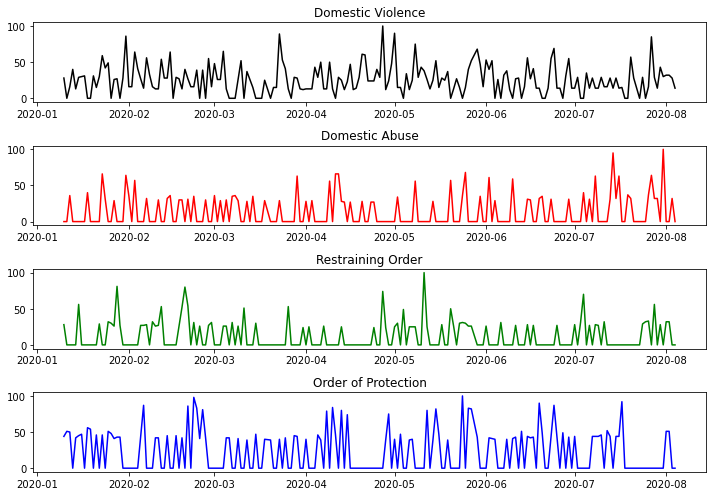

In [30]:
plt.figure(figsize=(10,7))

plt.subplot(4, 1, 1)
plt.plot(dfgroups['date'], dfgroups["domestic violence"],'black')
plt.title('Domestic Violence')

plt.subplot(4, 1, 2)
plt.plot(dfgroups['date'], dfgroups["domestic abuse"],'red')
plt.title('Domestic Abuse')

plt.subplot(4, 1, 3)
plt.plot(dfgroups['date'],dfgroups["restraining order"],'green')
plt.title('Restraining Order')

plt.subplot(4, 1, 4)
plt.plot(dfgroups['date'],dfgroups["order of protection"],'blue')
plt.title('Order of Protection')

plt.tight_layout()
plt.savefig("rawsearchtermsgraph.png", dpi = 350)
plt.show();